In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글깨짐방지
# from matplotlib import font_manager, rc
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# rc('font', family=font_name)

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [11]:
# data load
# encoding : 윈도우즈 환경에서의 한글 처리
# engine : python 3.6에서 한글이 포함된 파일이름 사용
raw_data = pd.read_csv('../../data/seoul_pollution.csv', encoding='CP949', engine='python')

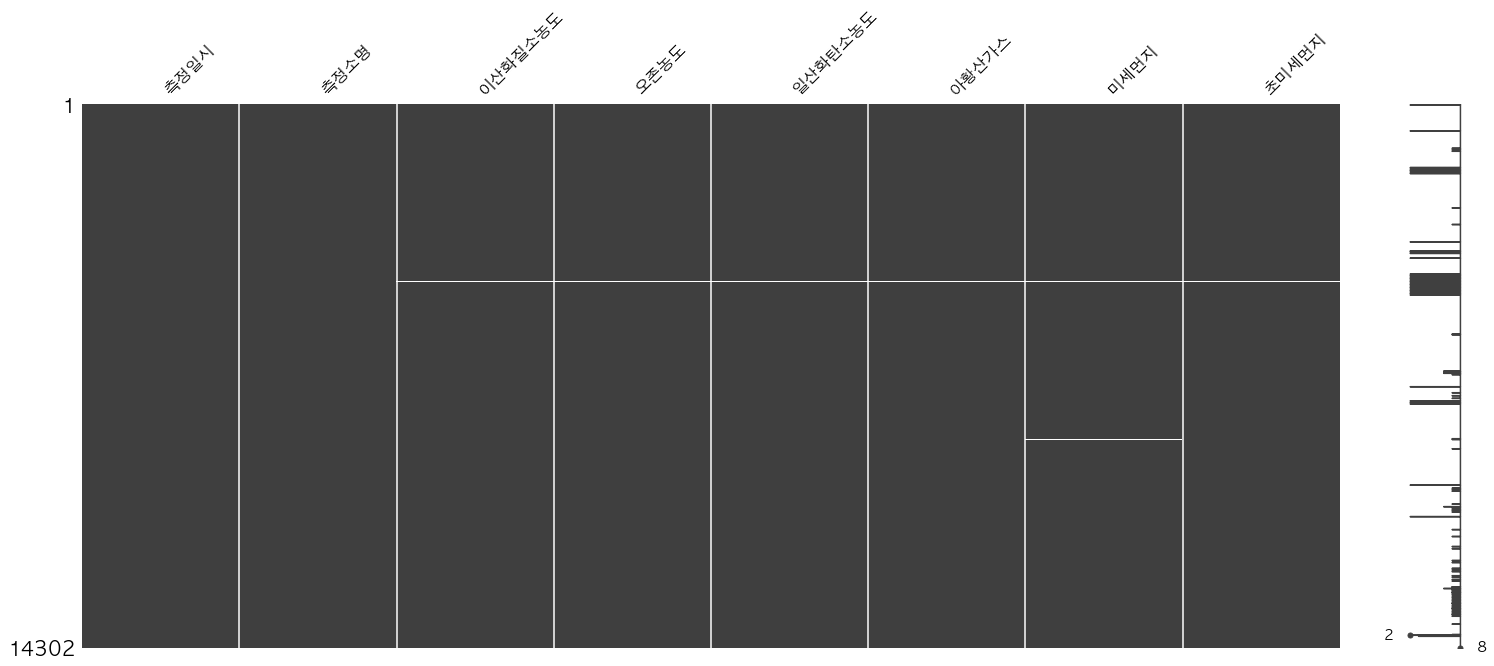

In [12]:
# 결측치 확인 
import missingno as msno
msno.matrix(raw_data)

<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i>  MaxAbsScaler 사용하여 스케일링
  </h2>
</div>

```python
from sklearn.preprocessing import MaxAbsScaler
```

# 결측치 보간하기
- 결측치 날리기 
- 결측치 0으로 채우기 
- 결측치를 평균으로 채우기 
- interpolation방법을 이용하여 채우기 


In [13]:
# 1. 결측치 날리기 
raw_data.dropna()

,측정일시,측정소명,이산화질소농도,오존농도,일산화탄소농도,아황산가스,미세먼지,초미세먼지
0,20160606,강남구,0.020,0.041,0.2,0.004,23.0,15.0
1,20160606,강동구,0.012,0.040,0.3,0.004,24.0,16.0
2,20160606,강변북로,0.046,0.025,0.3,0.004,28.0,15.0
3,20160606,강북구,0.020,0.044,0.3,0.002,16.0,12.0
4,20160606,강서구,0.023,0.029,0.3,0.005,33.0,22.0
...,...,...,...,...,...,...,...,...
14297,20150606,중구,0.035,0.041,0.4,0.005,31.0,22.0
14298,20150606,중랑구,0.023,0.041,0.3,0.005,31.0,18.0
14299,20150606,청계천,0.040,0.038,0.5,0.009,34.0,12.0
14300,20150606,청량리,0.044,0.034,0.5,0.005,33.0,24.0


In [14]:
# 2. 결측치를 0으로 채우기 
raw_data.fillna(0)

,측정일시,측정소명,이산화질소농도,오존농도,일산화탄소농도,아황산가스,미세먼지,초미세먼지
0,20160606,강남구,0.020,0.041,0.2,0.004,23.0,15.0
1,20160606,강동구,0.012,0.040,0.3,0.004,24.0,16.0
2,20160606,강변북로,0.046,0.025,0.3,0.004,28.0,15.0
3,20160606,강북구,0.020,0.044,0.3,0.002,16.0,12.0
4,20160606,강서구,0.023,0.029,0.3,0.005,33.0,22.0
...,...,...,...,...,...,...,...,...
14297,20150606,중구,0.035,0.041,0.4,0.005,31.0,22.0
14298,20150606,중랑구,0.023,0.041,0.3,0.005,31.0,18.0
14299,20150606,청계천,0.040,0.038,0.5,0.009,34.0,12.0
14300,20150606,청량리,0.044,0.034,0.5,0.005,33.0,24.0


In [15]:
# 3. 결측치를 평균 으로 채우기 
raw_data.fillna(raw_data.mean())

,측정일시,측정소명,이산화질소농도,오존농도,일산화탄소농도,아황산가스,미세먼지,초미세먼지
0,20160606,강남구,0.020,0.041,0.2,0.004,23.0,15.0
1,20160606,강동구,0.012,0.040,0.3,0.004,24.0,16.0
2,20160606,강변북로,0.046,0.025,0.3,0.004,28.0,15.0
3,20160606,강북구,0.020,0.044,0.3,0.002,16.0,12.0
4,20160606,강서구,0.023,0.029,0.3,0.005,33.0,22.0
...,...,...,...,...,...,...,...,...
14297,20150606,중구,0.035,0.041,0.4,0.005,31.0,22.0
14298,20150606,중랑구,0.023,0.041,0.3,0.005,31.0,18.0
14299,20150606,청계천,0.040,0.038,0.5,0.009,34.0,12.0
14300,20150606,청량리,0.044,0.034,0.5,0.005,33.0,24.0


In [16]:
# 4. interpolationa 방법을 사용하기
# 각 열의 값을 보고 채우기 axis=0 
# pandas interpolate(보간법) 함수를 사용해서 결측치를 채운다
# method=linear 보간법 함수가 linear 
# limit_direction='backward' # 뒤에서 부터 채워 오기 
# imit_direction='forward' # 앞에서 채우기 
# imit_direction='both' # 양 옆에서 채워나가기 


In [17]:
raw_data.interpolate(method='linear', axis=0, limit_direction='both')

,측정일시,측정소명,이산화질소농도,오존농도,일산화탄소농도,아황산가스,미세먼지,초미세먼지
0,20160606,강남구,0.020,0.041,0.2,0.004,23.0,15.0
1,20160606,강동구,0.012,0.040,0.3,0.004,24.0,16.0
2,20160606,강변북로,0.046,0.025,0.3,0.004,28.0,15.0
3,20160606,강북구,0.020,0.044,0.3,0.002,16.0,12.0
4,20160606,강서구,0.023,0.029,0.3,0.005,33.0,22.0
...,...,...,...,...,...,...,...,...
14297,20150606,중구,0.035,0.041,0.4,0.005,31.0,22.0
14298,20150606,중랑구,0.023,0.041,0.3,0.005,31.0,18.0
14299,20150606,청계천,0.040,0.038,0.5,0.009,34.0,12.0
14300,20150606,청량리,0.044,0.034,0.5,0.005,33.0,24.0


<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i>  MaxAbsScaler 사용하여 스케일링
  </h2>
</div>

```python
from sklearn.preprocessing import MaxAbsScaler
```

<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i>  MaxAbsScaler 사용하여 스케일링
  </h2>
</div>

```python
# 모델가져오기 
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
model_linear = LinearRegression()
model_lasso = Lasso()
model_elastic = ElasticNet()
```